# Delta Equity 90 Days

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        4520      172693-3434649.5000     -4.2000      0.0000    226.7401      7.50004434737.9000  27771.1916 


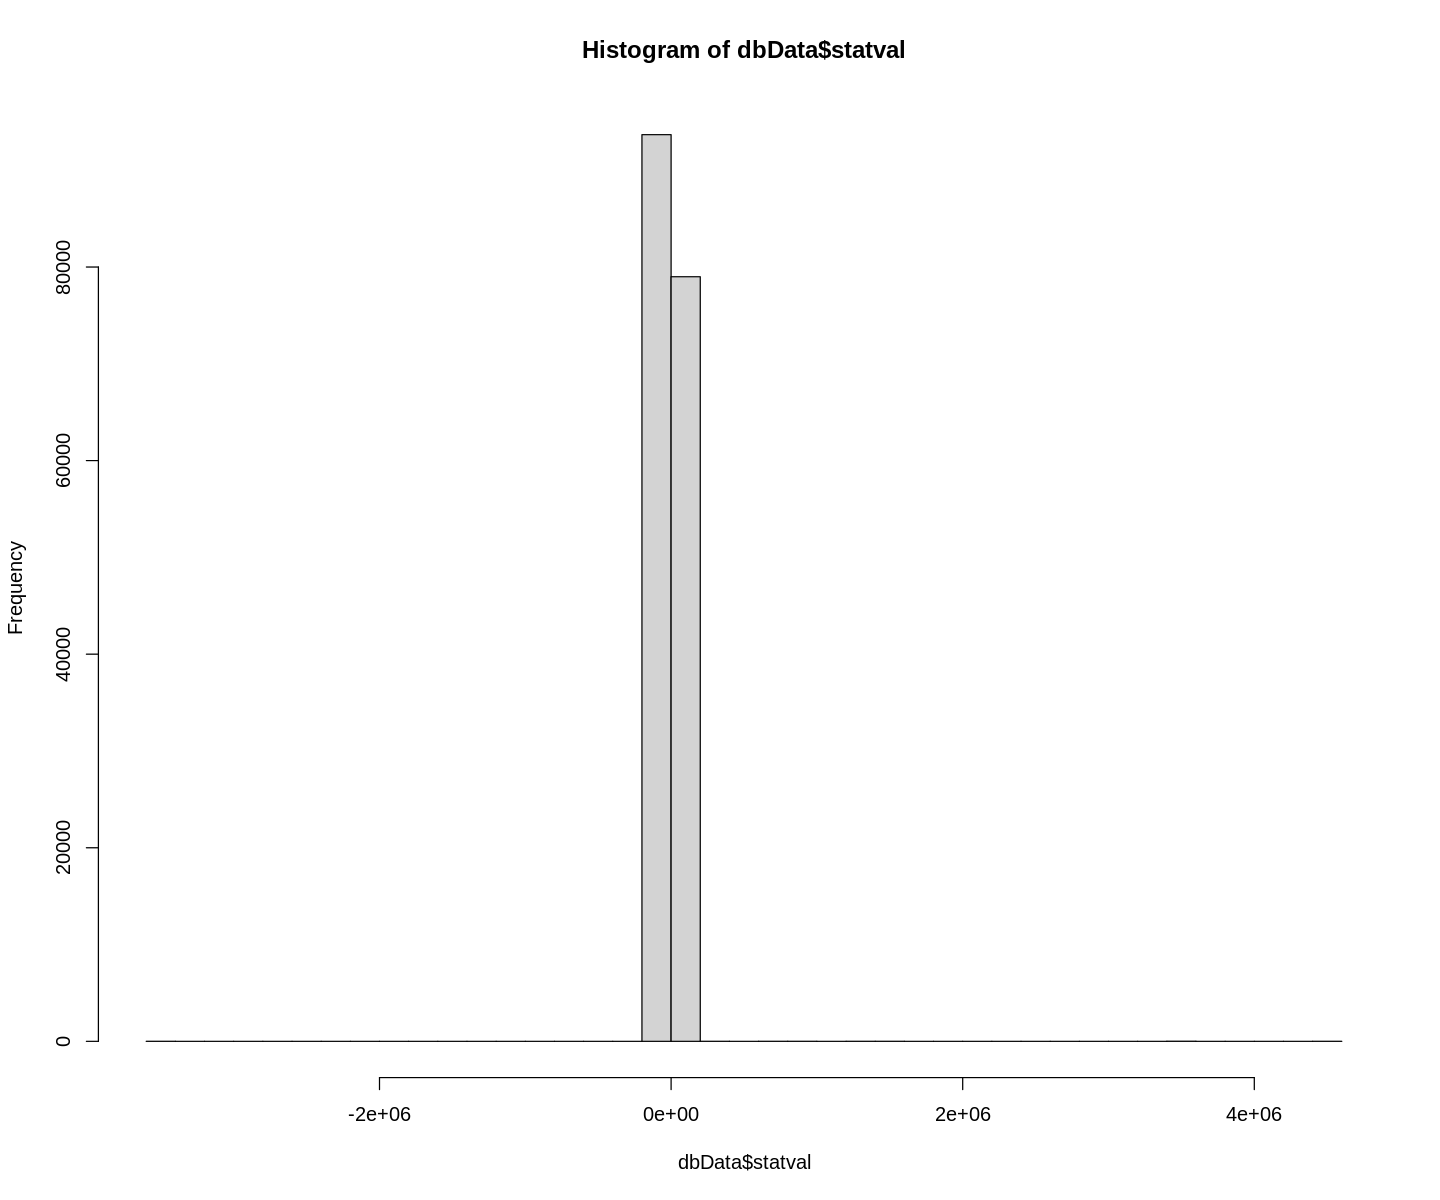

In [2]:
# What data we have.
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval
            from historical_stats_modern where statname='deltaequityp90'") 
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        4234      160476    -50.0000     -3.6000      0.0000      1.1630      6.6000     50.0000     13.9448 


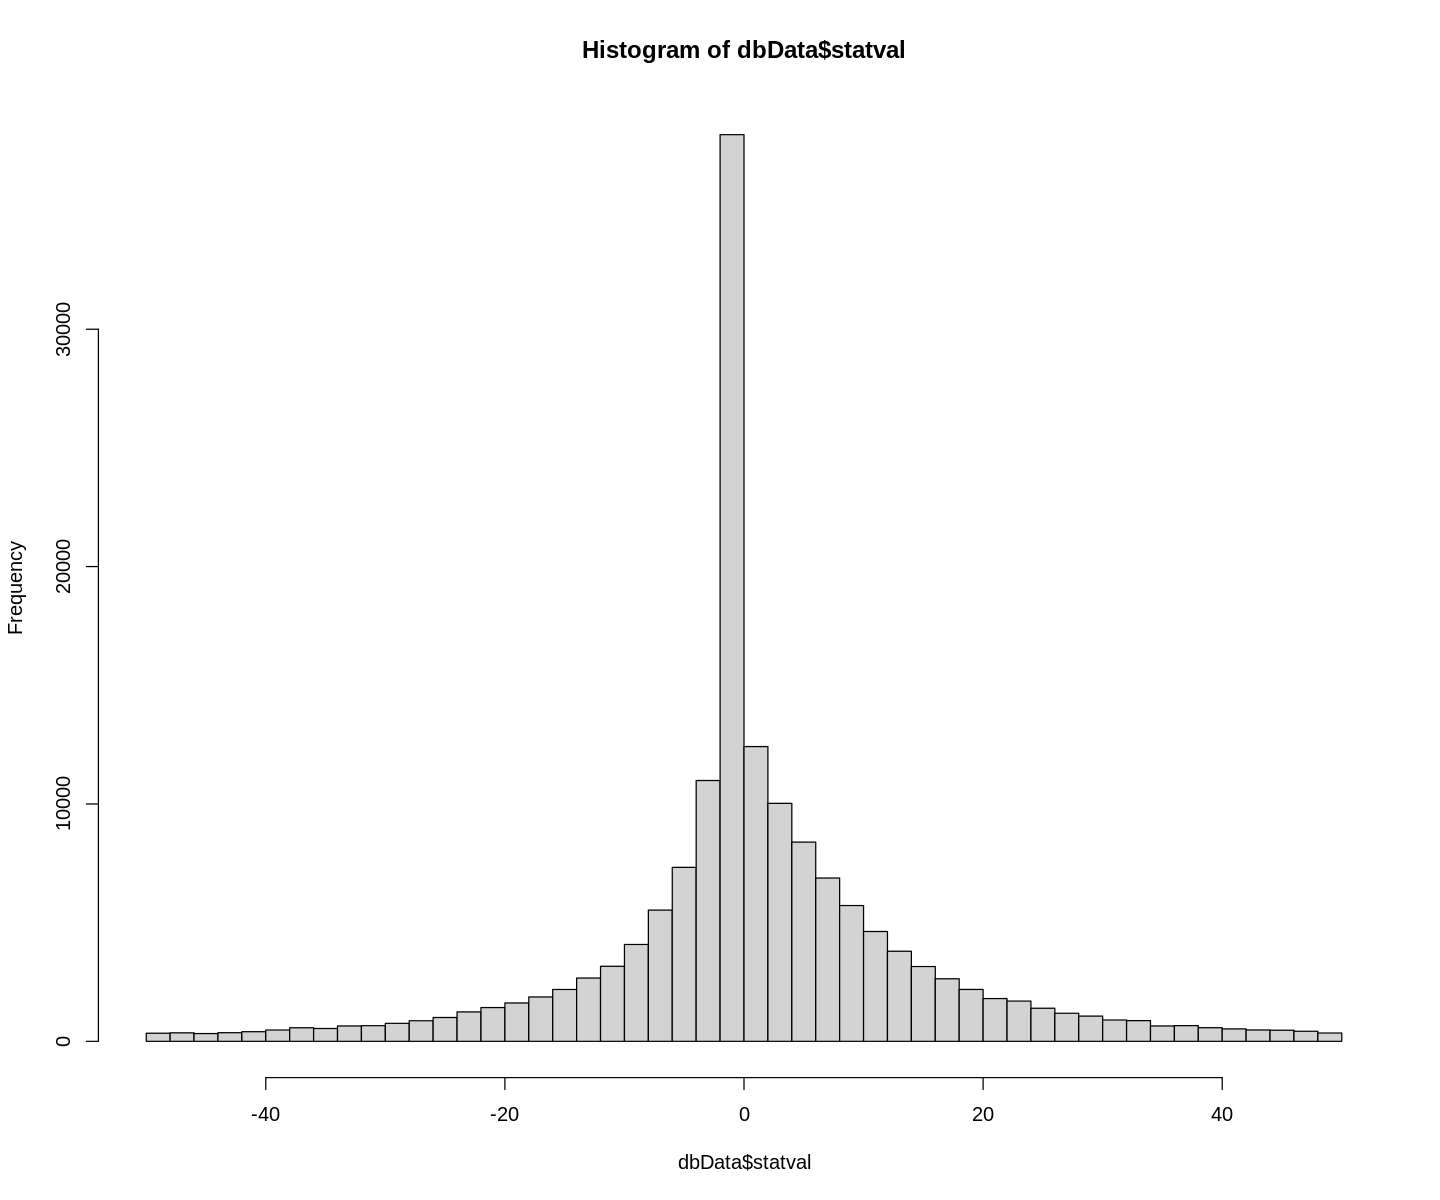

In [3]:
# Delta equity 90 days (3 month). Somewhere between -50 and +50 percent
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval
            from historical_stats_modern where statname='deltaequityp90' 
            and statval >= -50 and statval <= 50")
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1899       57699    -15.0000     -1.8000      1.6000      4.5832      9.3000     50.0000     11.0300 


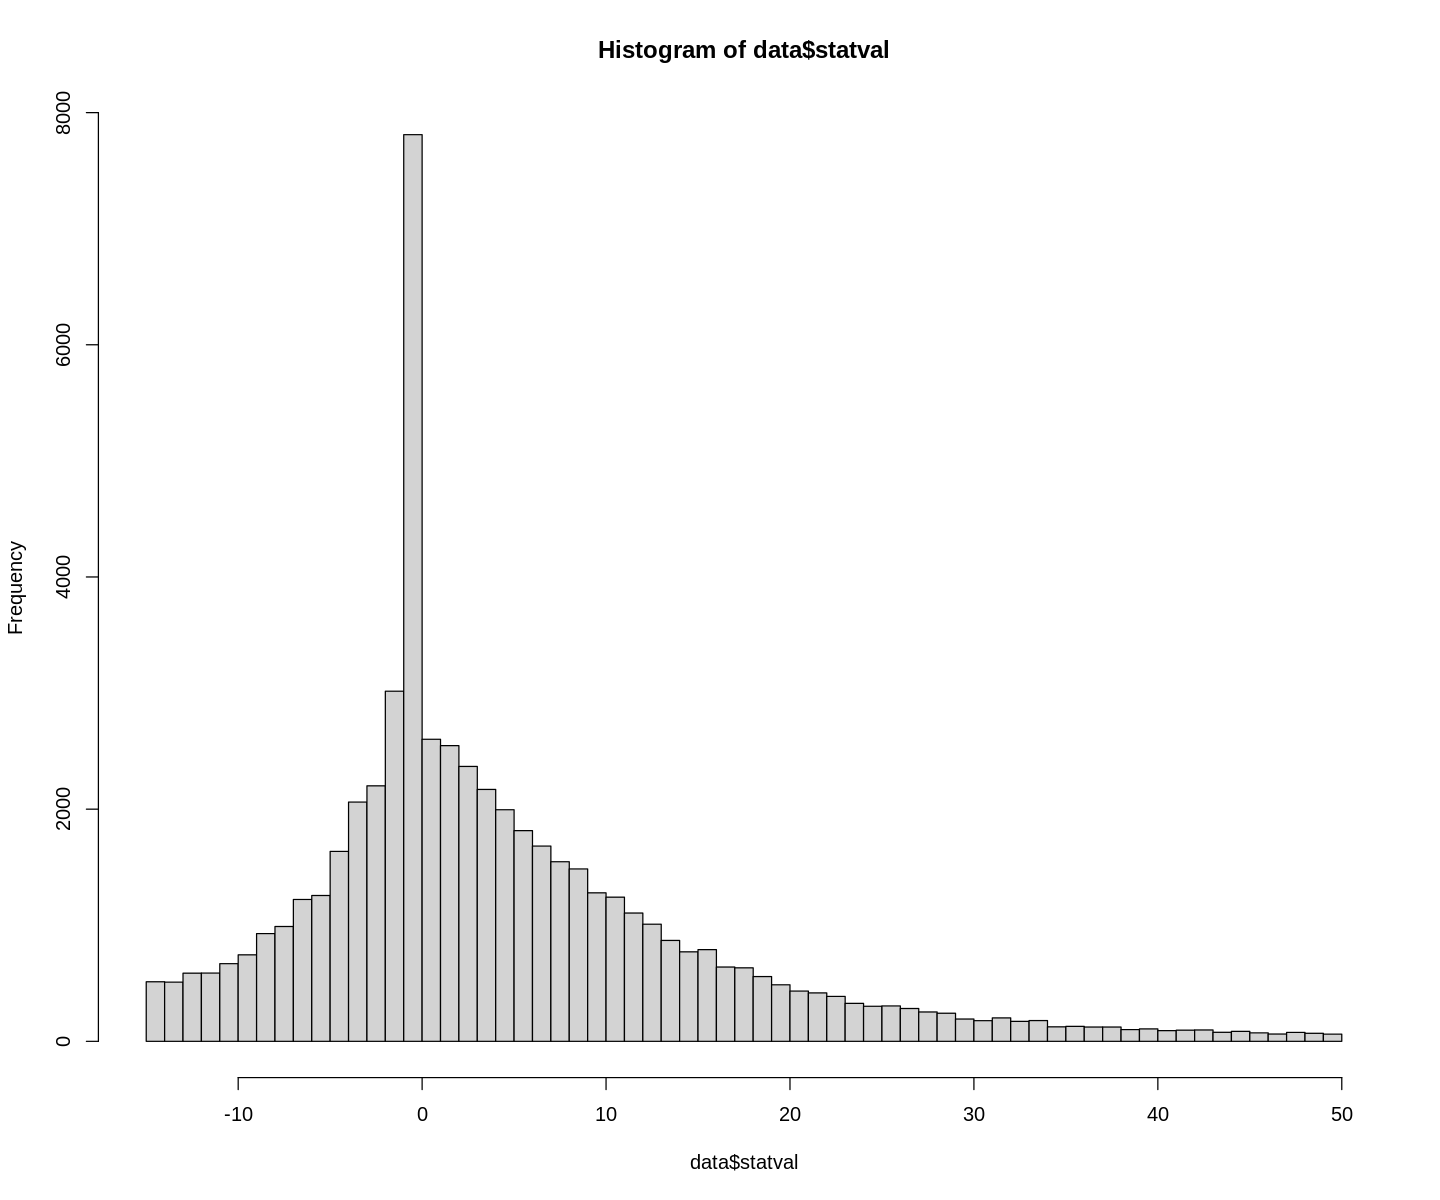

In [4]:
# Join with cleaned data. 
# Further investigation shows that we can accept small negative values too. 
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where statname='deltaequityp90' and  statval >= -15 and statval <= 50"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1899       57699    -15.0000     -1.8000      1.6000      4.5832      9.3000     50.0000     11.0300 



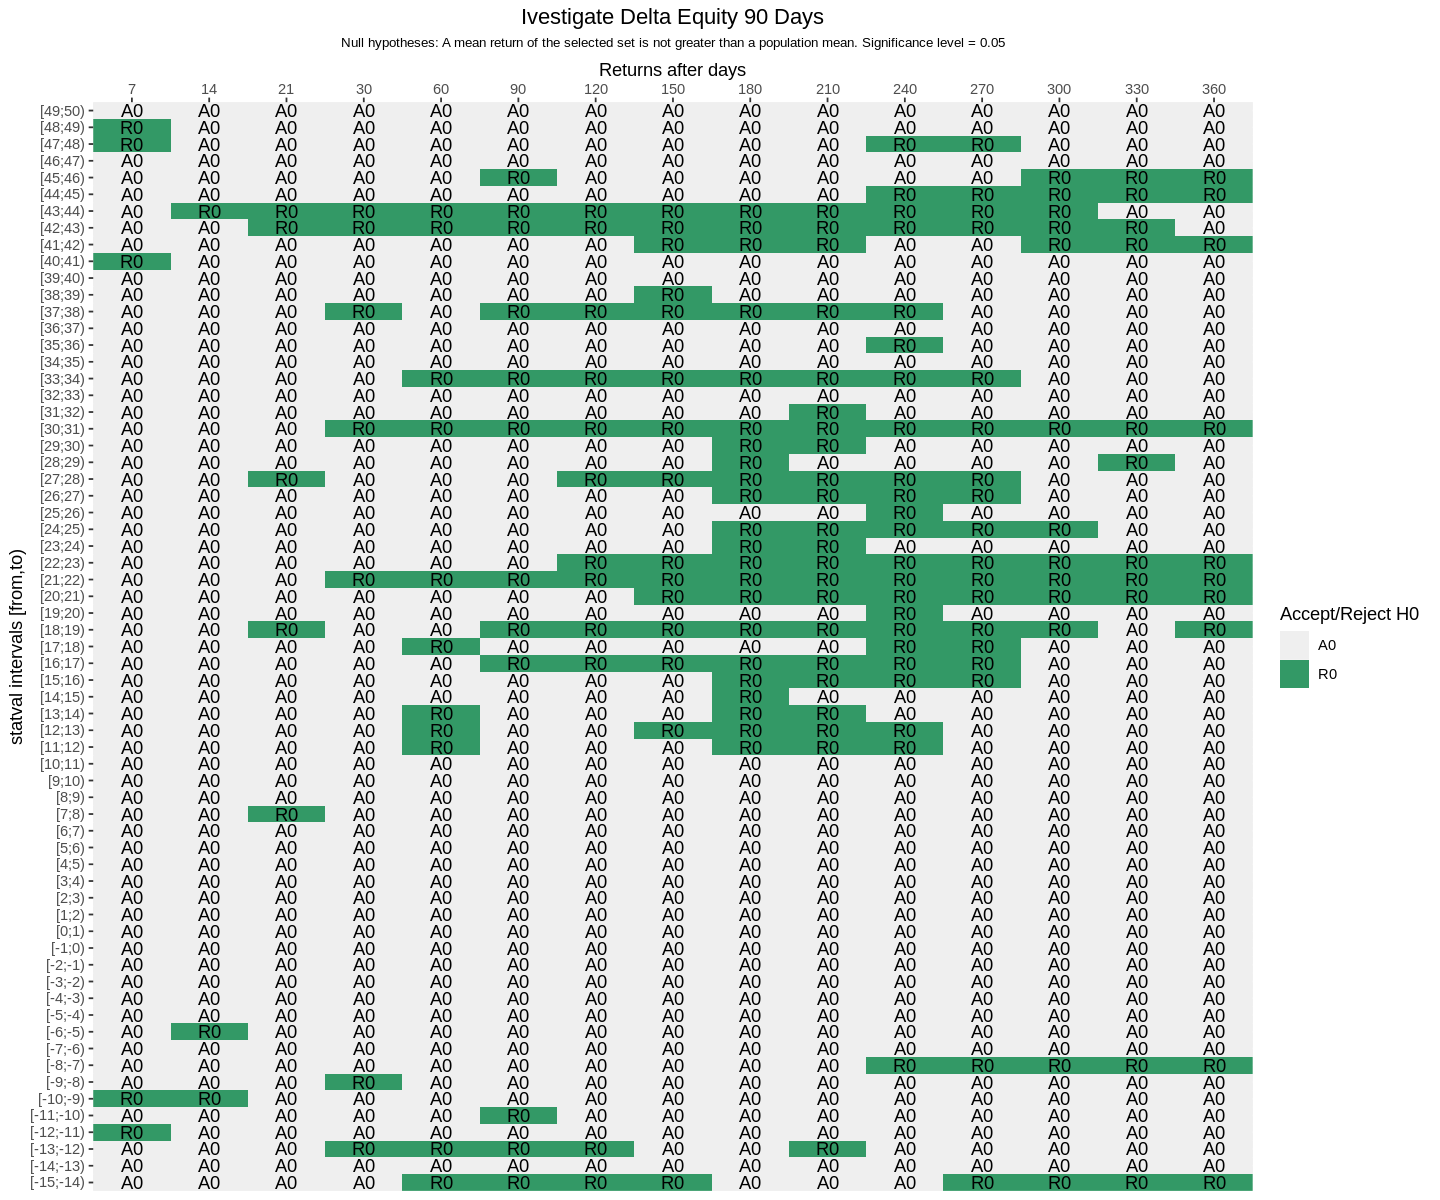

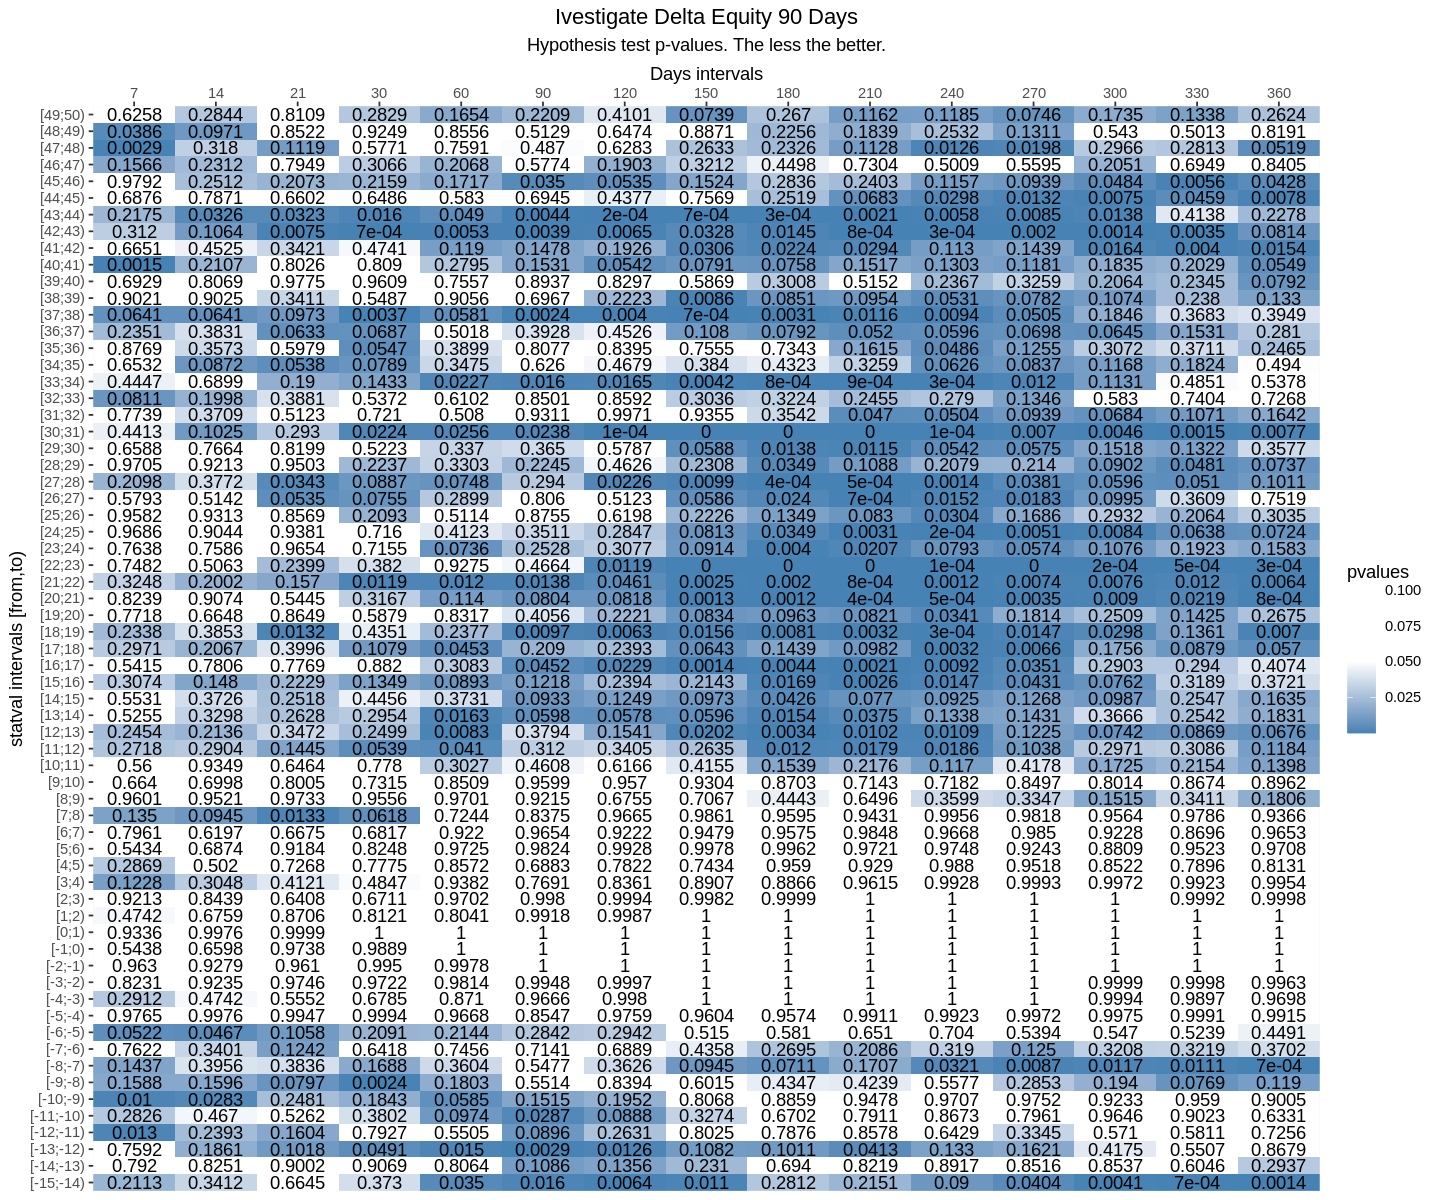

In [5]:
experiment = list(
  name = "deltaequityp90",
  description = "Ivestigate Delta Equity 90 Days",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = -15, to = 50, by = 1))
result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


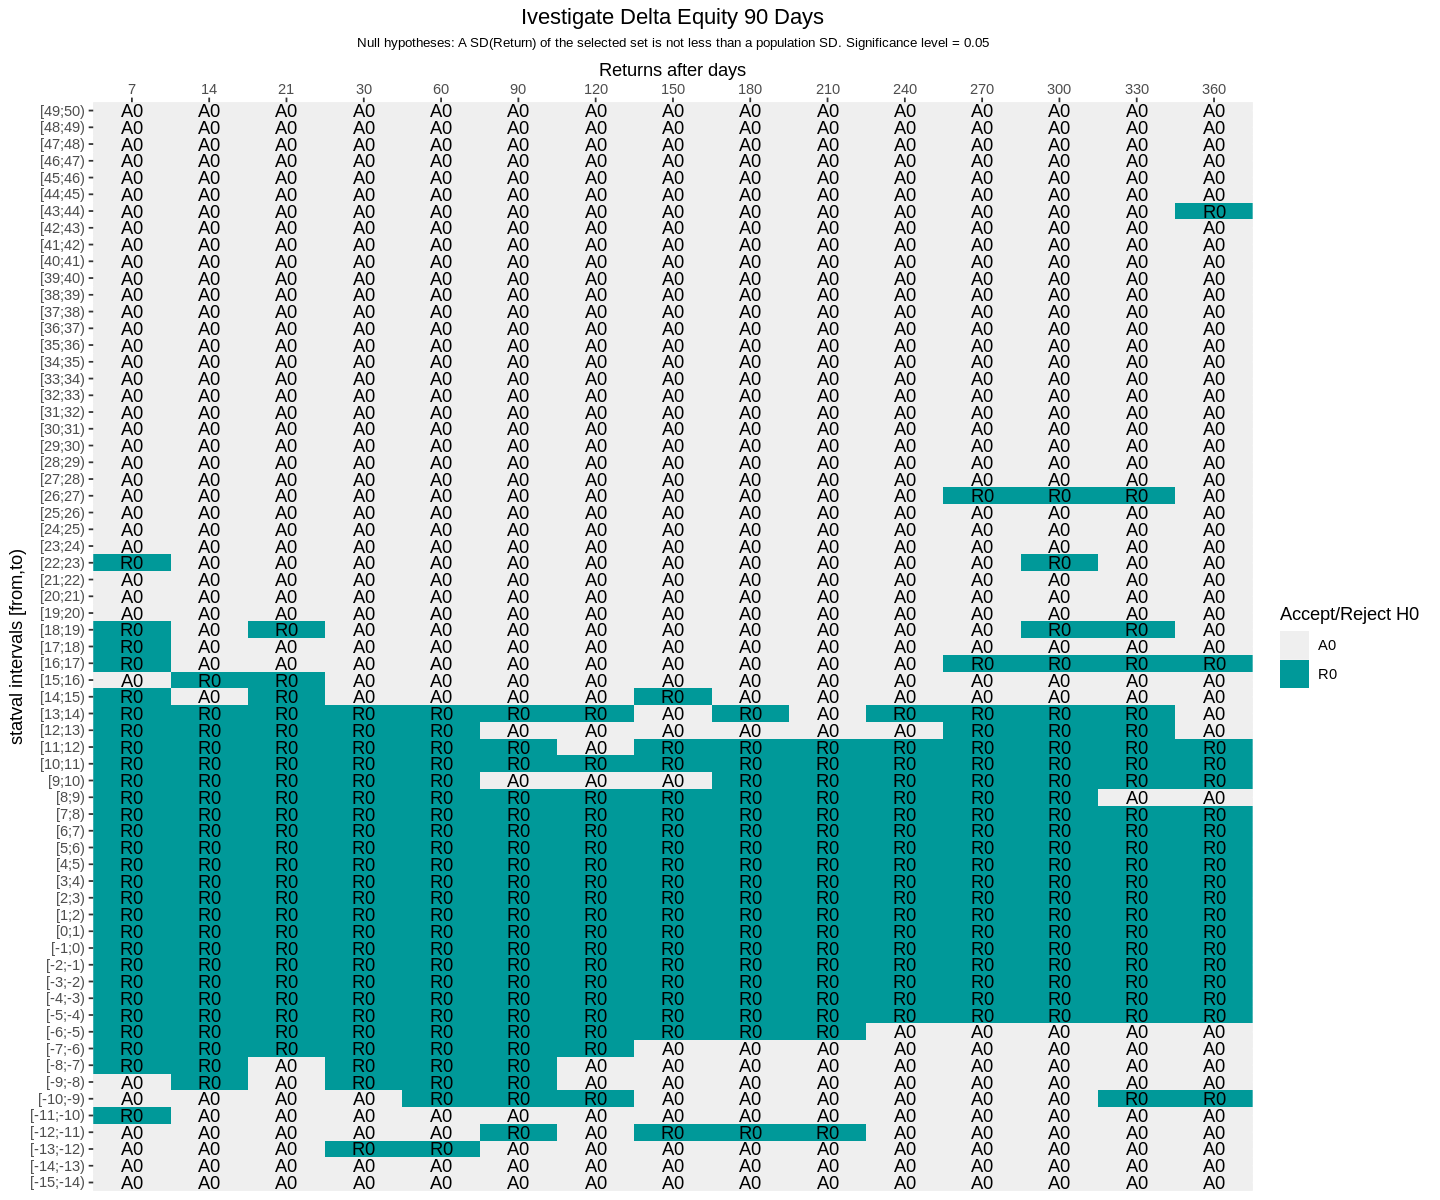

In [6]:
showSDLessHypothesisTest(experiment, result)

In [7]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection            Obs007 Obs014 Obs021 Obs030 Obs060 Obs090 Obs120 Obs150
1  49 <= statval < 50    57     55     53     53     46     42     38     29   
2  48 <= statval < 49    69     68     67     66     61     56     54     49   
3  47 <= statval < 48    79     76     73     71     65     56     49     41   
4  46 <= statval < 47    57     56     55     54     45     43     38     33   
5  45 <= statval < 46    73     71     70     69     63     56     49     46   
6  44 <= statval < 45    89     87     86     82     75     65     63     57   
7  43 <= statval < 44    73     73     72     70     62     56     50     45   
8  42 <= statval < 43    91     88     85     82     77     69     66     53   
9  41 <= statval < 42    94     92     88     84     79     75     70     57   
10 40 <= statval < 41    91     88     84     83     73     66     59     53   
11 39 <= statval < 40   112    107    103     99     93     82     75     62   
12 38 <= statval < 39    95     93     91     89     83     71     61     50   
13 37 <= statval < 38   126    126    125    121    111    100     95     80   
14 36 <= statval < 37   119    117    112    108    104     98     87     81   
15 35 <= statval < 36   123    117    112    108     98     87     80     71   
16 34 <= statval < 35   129    126    125    122    110     94     86     75   
17 33 <= statval < 34   174    172    171    170    155    138    127    116   
18 32 <= statval < 33   167    161    159    155    142    131    120    102   
19 31 <= statval < 32   202    199    194    189    164    151    142    120   
20 30 <= statval < 31   163    159    158    154    140    135    122    113   
21 29 <= statval < 30   198    196    194    187    169    151    144    125   
22 28 <= statval < 29   243    240    236    228    210    196    186    170   
23 27 <= statval < 28   252    251    244    241    212    194    175    153   
24 26 <= statval < 27   273    270    259    249    230    203    178    152   
25 25 <= statval < 26   311    307    299    290    262    246    218    190   
26 24 <= statval < 25   297    290    281    278    253    228    205    187   
27 23 <= statval < 24   314    308    303    293    254    225    202    173   
28 22 <= statval < 23   385    380    369    358    323    288    253    235   
29 21 <= statval < 22   415    406    394    386    362    326    304    277   
30 20 <= statval < 21   442    438    433    421    373    335    298    267   
⋮  ⋮                    ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
36 14 <= statval < 15    754    736    707    686    620    559    519    468  
37 13 <= statval < 14    875    853    841    819    731    663    600    544  
38 12 <= statval < 13    972    952    931    909    816    742    685    625  
39 11 <= statval < 12   1110   1086   1058   1020    904    809    733    661  
40 10 <= statval < 11   1237   1206   1169   1143   1042    934    841    758  
41 9 <= statval < 10    1253   1226   1199   1162   1045    946    864    778  
42 8 <= statval < 9     1442   1418   1381   1331   1187   1059    958    879  
43 7 <= statval < 8     1528   1487   1445   1403   1247   1101   1011    920  
44 6 <= statval < 7     1654   1615   1576   1526   1368   1221   1108   1026  
45 5 <= statval < 6     1798   1748   1694   1639   1464   1328   1195   1093  
46 4 <= statval < 5     1949   1897   1861   1804   1631   1487   1347   1246  
47 3 <= statval < 4     2160   2125   2085   2032   1811   1624   1443   1328  
48 2 <= statval < 3     2383   2312   2254   2190   1964   1783   1620   1475  
49 1 <= statval < 2     2437   2375   2321   2266   2002   1790   1610   1467  
50 0 <= statval < 1     5665   5575   5466   5308   4821   4428   4050   3706  
51 -1 <= statval < 0    4642   4508   4368   4219   3780   3401   3063   2751  
52 -2 <= statval < -1   2775   2677   2595   2484   2185   1972   1737   1548  
53 -3 <= statval < -2   2154   2072   2008   1919   1690   1496   1304   1178  
54 


SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



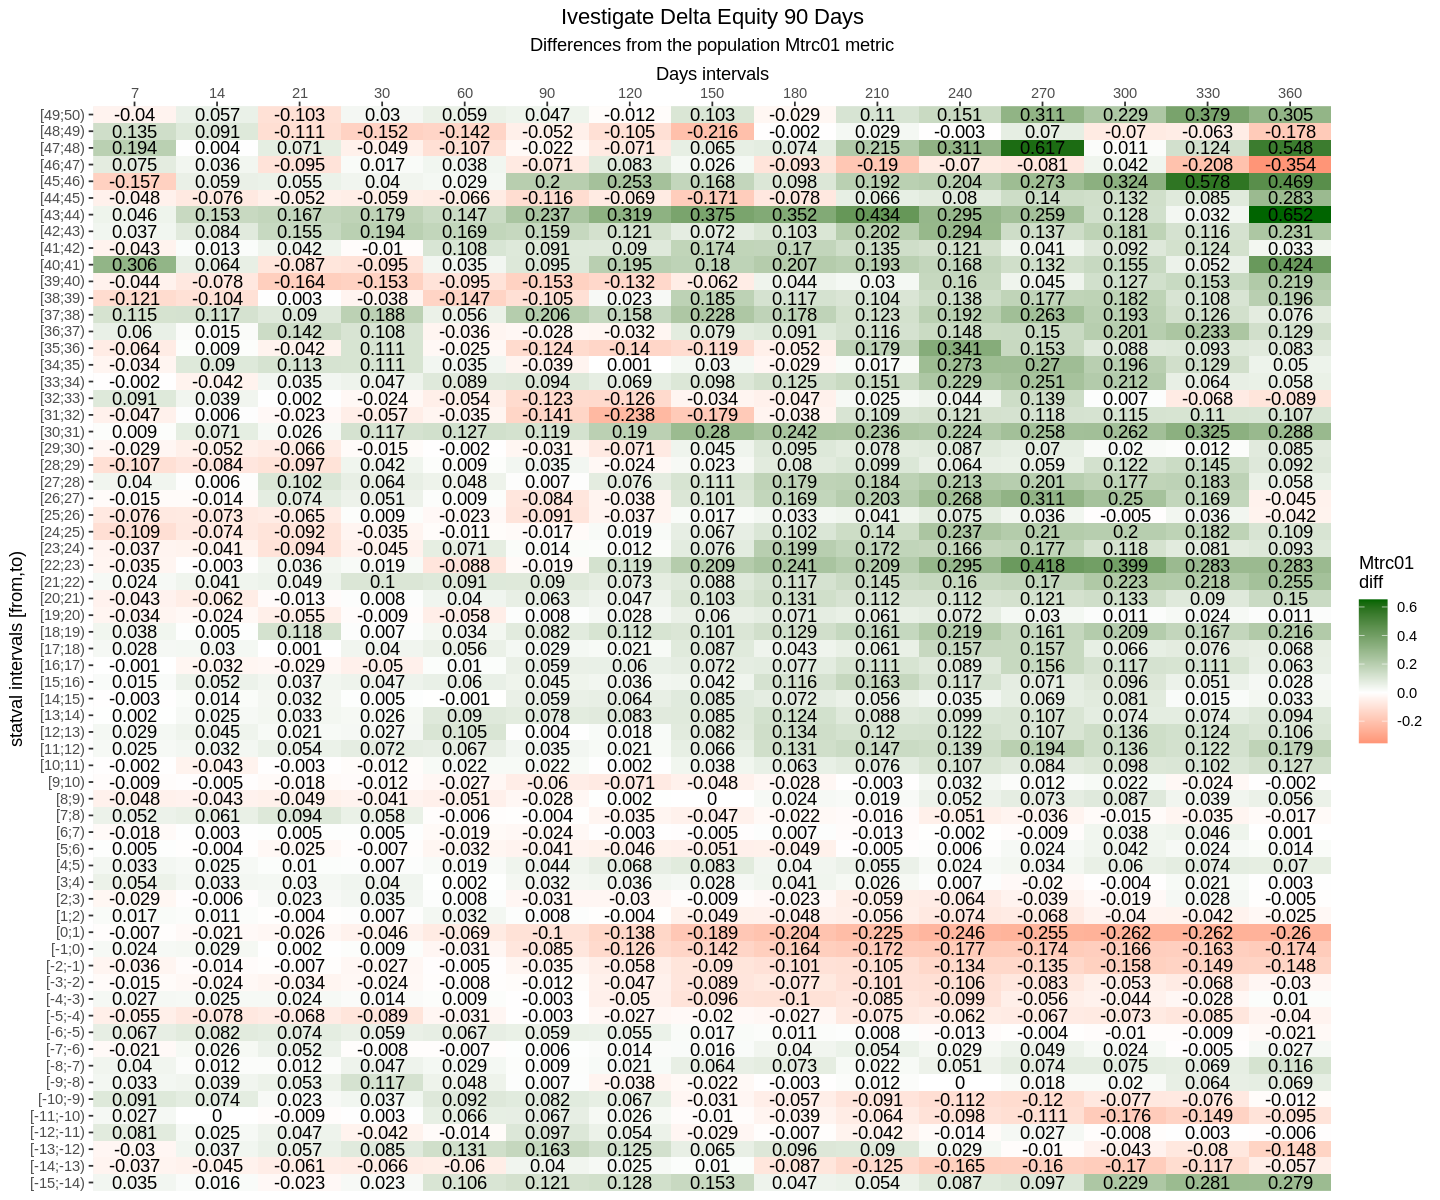

In [8]:
showMetricDifferences(experiment, result)

In [9]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection            Sys007 Sys014 Sys021 Sys030 Sys060 Sys090 Sys120 Sys150
1  49 <= statval < 50    47     45     43     43     36     33     31     25   
2  48 <= statval < 49    58     57     56     55     50     46     44     40   
3  47 <= statval < 48    66     63     61     59     54     47     40     35   
4  46 <= statval < 47    53     52     51     50     41     39     34     29   
5  45 <= statval < 46    63     61     60     59     54     49     42     39   
6  44 <= statval < 45    71     69     68     64     57     48     46     42   
7  43 <= statval < 44    65     65     64     62     54     48     42     38   
8  42 <= statval < 43    74     72     69     66     62     57     54     43   
9  41 <= statval < 42    72     71     67     63     58     56     51     43   
10 40 <= statval < 41    76     74     70     69     60     53     48     44   
11 39 <= statval < 40    94     90     86     82     77     68     61     50   
12 38 <= statval < 39    76     74     72     70     65     58     50     42   
13 37 <= statval < 38   100    100     99     95     86     77     73     64   
14 36 <= statval < 37    95     93     89     85     81     76     67     62   
15 35 <= statval < 36    92     89     86     85     78     71     65     58   
16 34 <= statval < 35   103    100     99     96     84     71     66     59   
17 33 <= statval < 34   128    126    125    124    111     99     89     83   
18 32 <= statval < 33   132    127    125    122    110    102     92     76   
19 31 <= statval < 32   148    146    142    139    118    108    102     85   
20 30 <= statval < 31   127    124    123    120    106    101     91     84   
21 29 <= statval < 30   145    143    143    137    122    109    103     91   
22 28 <= statval < 29   174    171    167    160    146    137    129    116   
23 27 <= statval < 28   183    182    177    174    149    134    120    106   
24 26 <= statval < 27   201    198    192    184    171    148    134    113   
25 25 <= statval < 26   211    207    202    195    175    162    145    130   
26 24 <= statval < 25   197    191    182    180    162    147    132    118   
27 23 <= statval < 24   221    216    212    203    181    156    139    119   
28 22 <= statval < 23   245    241    235    225    201    182    158    148   
29 21 <= statval < 22   248    243    234    227    209    186    172    156   
30 20 <= statval < 21   272    270    267    257    224    198    182    165   
⋮  ⋮                    ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
36 14 <= statval < 15   417    406    389    373    332    293    274    245   
37 13 <= statval < 14   442    436    432    421    371    340    308    279   
38 12 <= statval < 13   458    448    438    426    382    332    301    275   
39 11 <= statval < 12   513    504    490    467    411    358    326    292   
40 10 <= statval < 11   528    518    502    493    452    408    360    318   
41 9 <= statval < 10    548    533    526    505    445    398    359    314   
42 8 <= statval < 9     600    592    571    546    484    417    368    341   
43 7 <= statval < 8     624    605    587    568    502    434    389    347   
44 6 <= statval < 7     641    621    602    575    501    438    377    343   
45 5 <= statval < 6     674    654    634    610    535    475    419    374   
46 4 <= statval < 5     688    659    640    622    549    482    432    392   
47 3 <= statval < 4     706    689    673    654    569    506    438    398   
48 2 <= statval < 3     742    712    687    654    576    521    465    413   
49 1 <= statval < 2     741    718    694    673    583    495    439    397   
50 0 <= statval < 1     811    786    758    721    614    552    495    441   
51 -1 <= statval < 0    863    828    800    771    663    570    500    441   
52 -2 <= statval < -1   758    726    697    659    570    511    439    392   
53 -3 <= statval < -2   716    678    656    617    530    456    394    356   
54 

### Discussion

Daniil: Use the DeltaEquity90Days attribute with a negative value, this makes it possible to send good strategies in the top, despite a slight drawdown (7%). 
The idea is that everyone has loss periods, and this is not a reason to downgrade too much. 

## Age > 90

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1899       57695    -15.0000     -1.8000      1.6000      4.5827      9.3000     50.0000     11.0302 


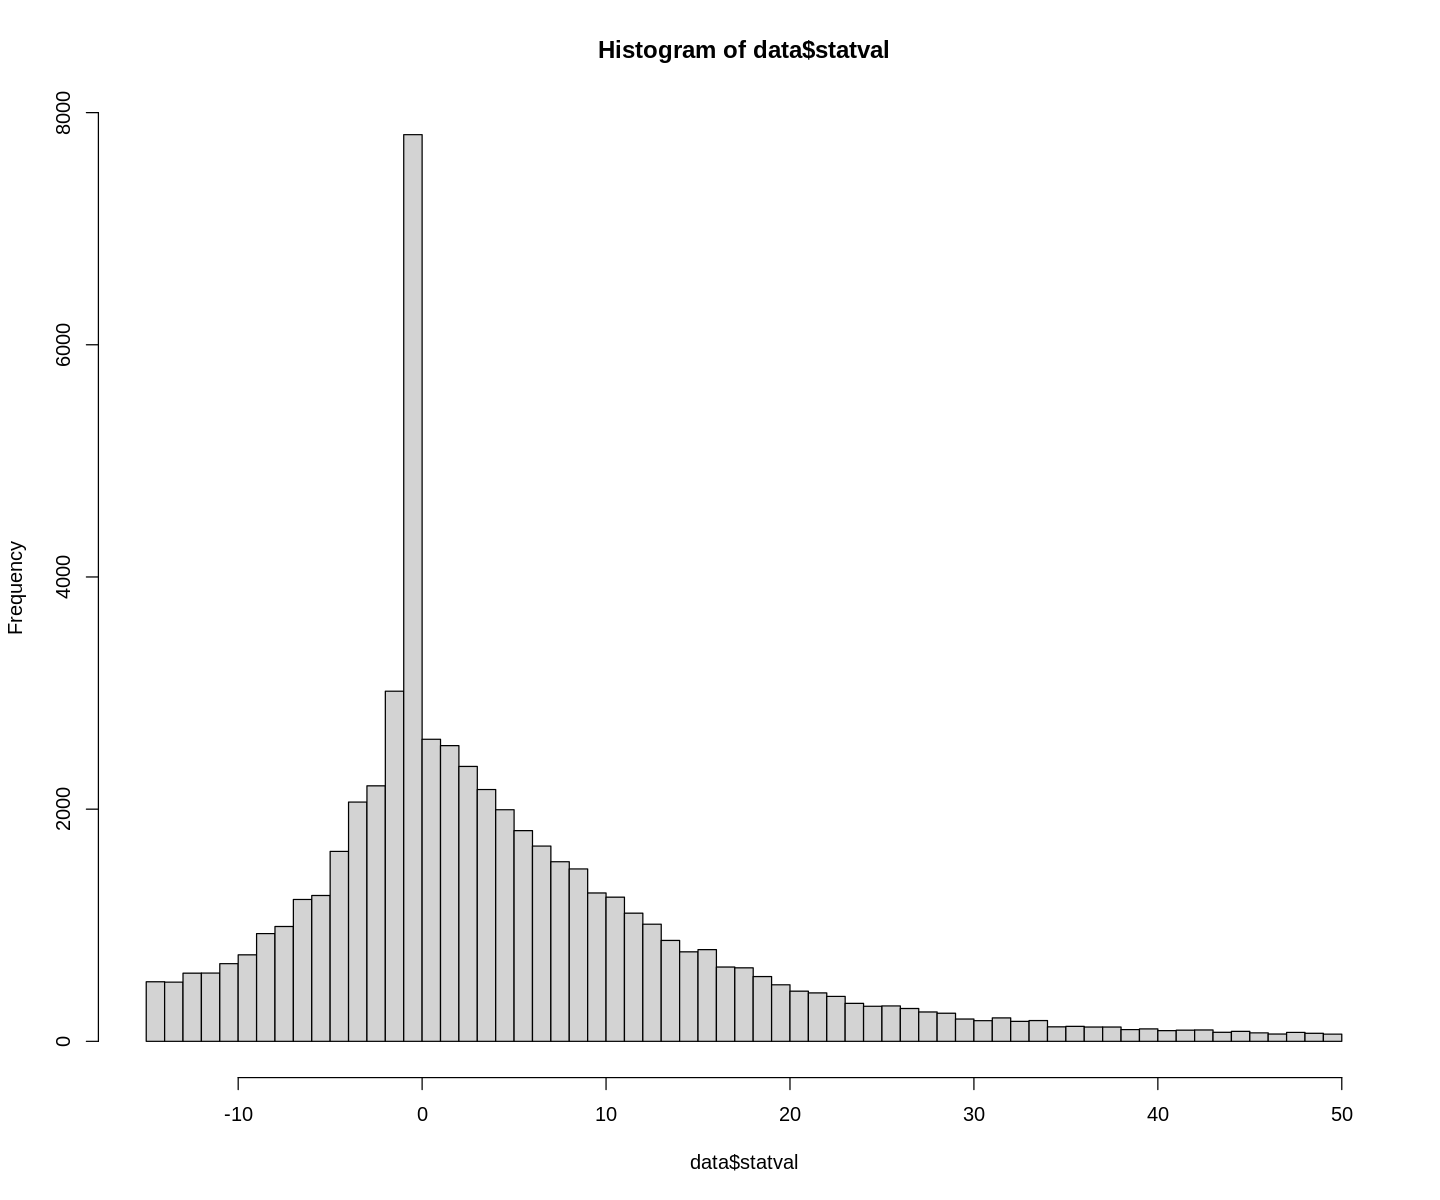

In [10]:
# Join with cleaned data. 
# Further investigation shows that we can accept small negative values too. 
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where statname='deltaequityp90' and  statval >= -15 and statval <= 50 and Age > 90"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1899       57695    -15.0000     -1.8000      1.6000      4.5827      9.3000     50.0000     11.0302 



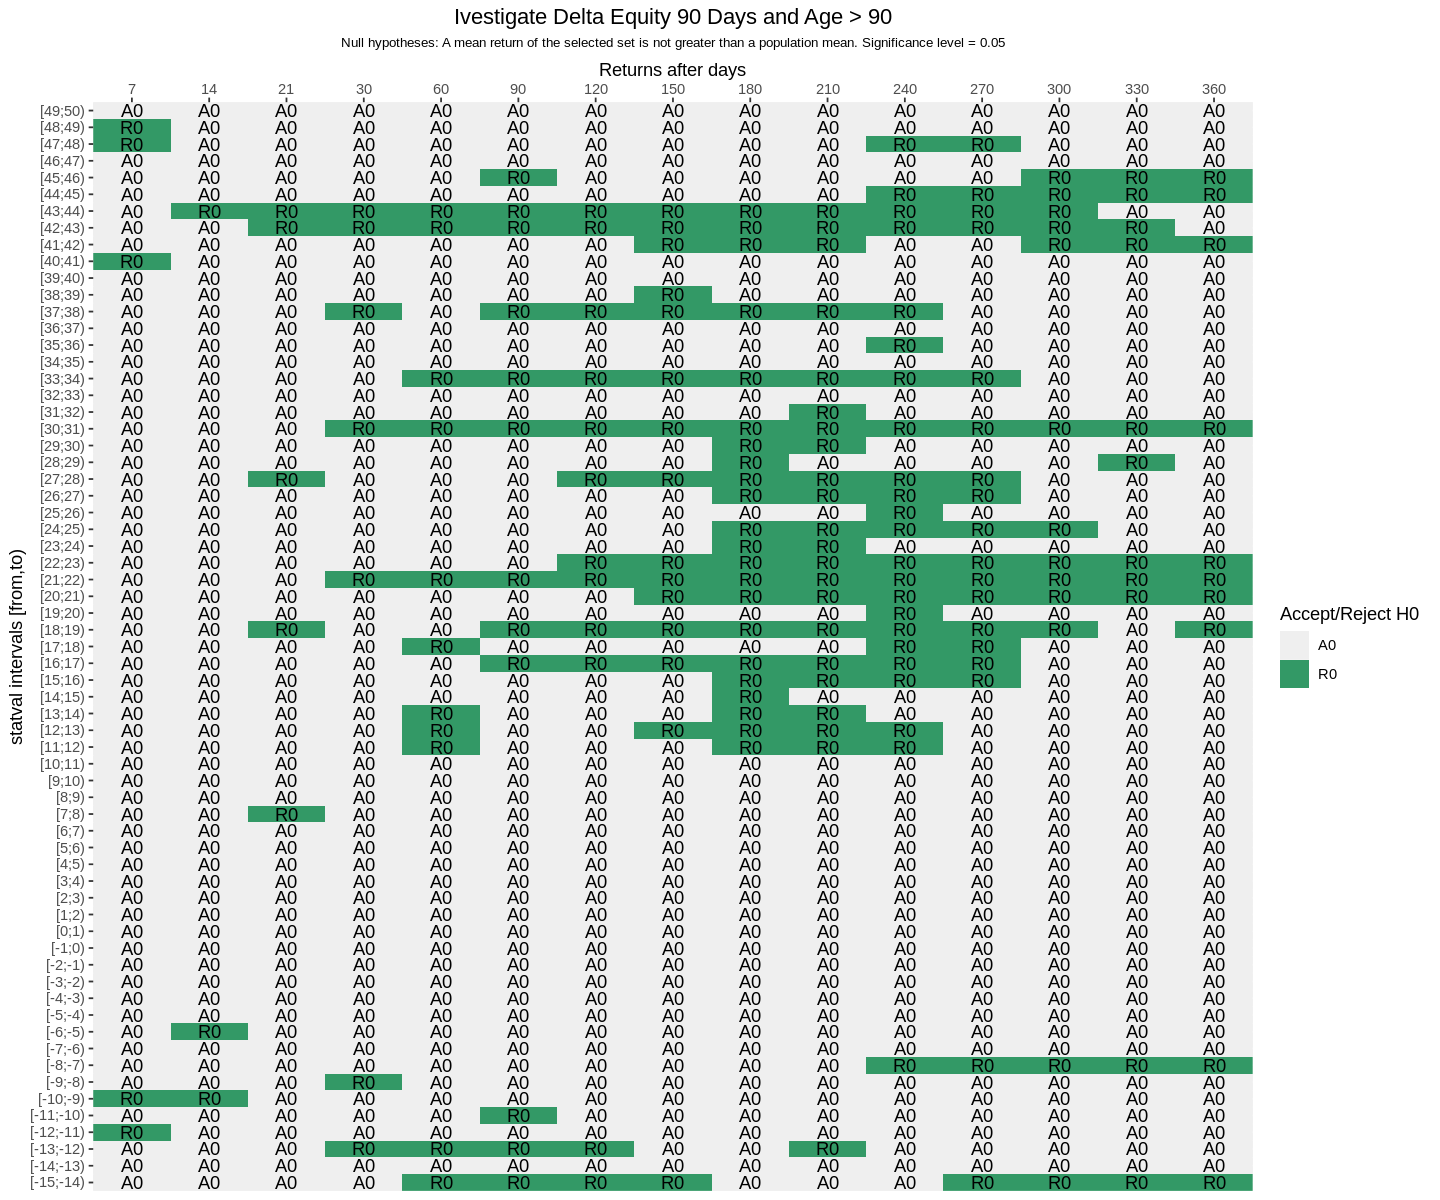

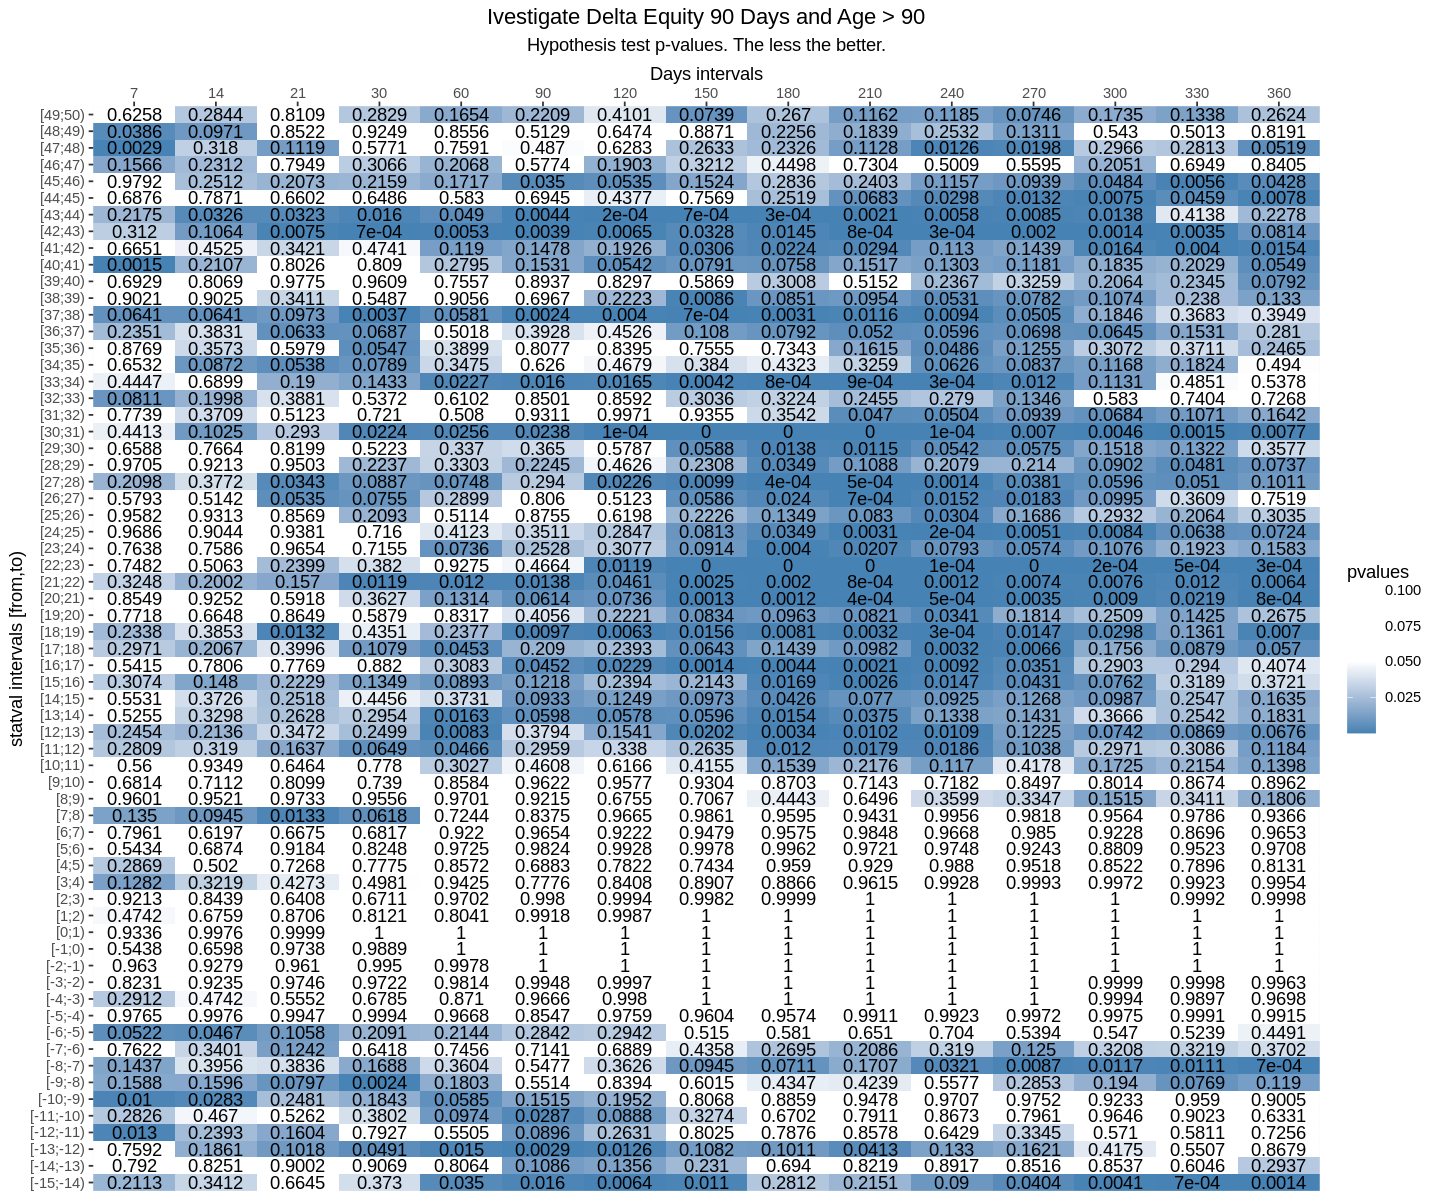

In [11]:
experiment = list(
  name = "deltaequityp90 and Age > 90",
  description = "Ivestigate Delta Equity 90 Days and Age > 90",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = -15, to = 50, by = 1))
result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


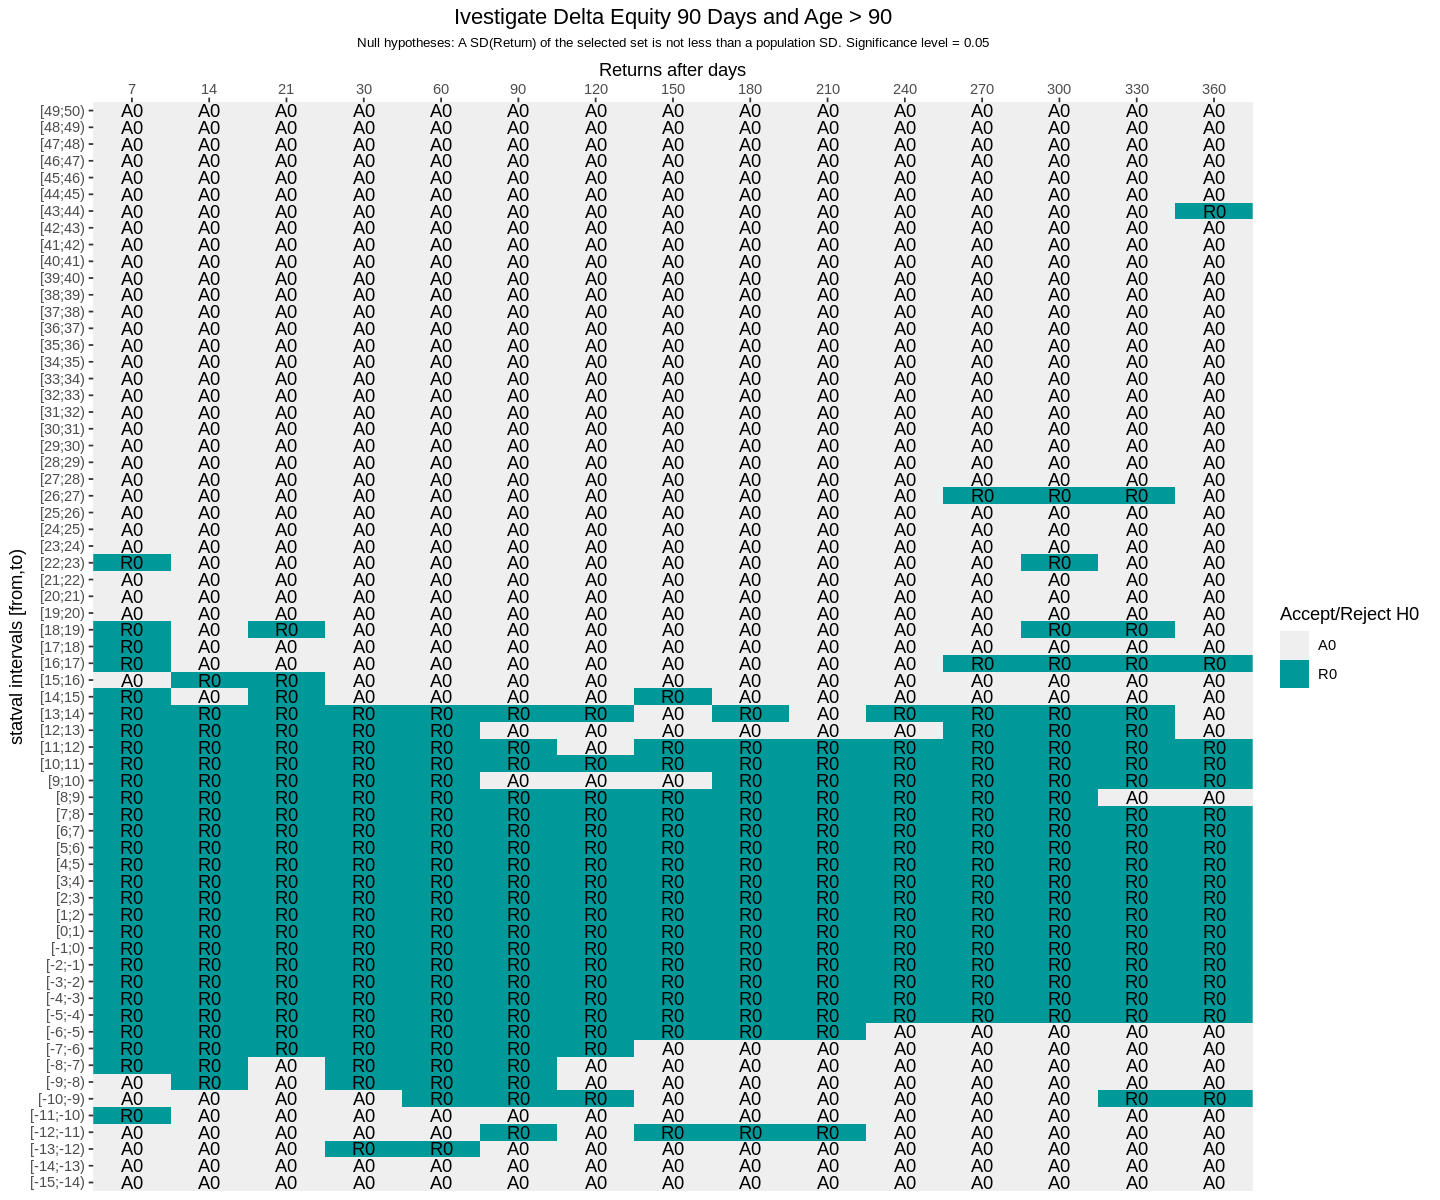

In [12]:
showSDLessHypothesisTest(experiment, result)

In [13]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection            Obs007 Obs014 Obs021 Obs030 Obs060 Obs090 Obs120 Obs150
1  49 <= statval < 50    57     55     53     53     46     42     38     29   
2  48 <= statval < 49    69     68     67     66     61     56     54     49   
3  47 <= statval < 48    79     76     73     71     65     56     49     41   
4  46 <= statval < 47    57     56     55     54     45     43     38     33   
5  45 <= statval < 46    73     71     70     69     63     56     49     46   
6  44 <= statval < 45    89     87     86     82     75     65     63     57   
7  43 <= statval < 44    73     73     72     70     62     56     50     45   
8  42 <= statval < 43    91     88     85     82     77     69     66     53   
9  41 <= statval < 42    94     92     88     84     79     75     70     57   
10 40 <= statval < 41    91     88     84     83     73     66     59     53   
11 39 <= statval < 40   112    107    103     99     93     82     75     62   
12 38 <= statval < 39    95     93     91     89     83     71     61     50   
13 37 <= statval < 38   126    126    125    121    111    100     95     80   
14 36 <= statval < 37   119    117    112    108    104     98     87     81   
15 35 <= statval < 36   123    117    112    108     98     87     80     71   
16 34 <= statval < 35   129    126    125    122    110     94     86     75   
17 33 <= statval < 34   174    172    171    170    155    138    127    116   
18 32 <= statval < 33   167    161    159    155    142    131    120    102   
19 31 <= statval < 32   202    199    194    189    164    151    142    120   
20 30 <= statval < 31   163    159    158    154    140    135    122    113   
21 29 <= statval < 30   198    196    194    187    169    151    144    125   
22 28 <= statval < 29   243    240    236    228    210    196    186    170   
23 27 <= statval < 28   252    251    244    241    212    194    175    153   
24 26 <= statval < 27   273    270    259    249    230    203    178    152   
25 25 <= statval < 26   311    307    299    290    262    246    218    190   
26 24 <= statval < 25   297    290    281    278    253    228    205    187   
27 23 <= statval < 24   314    308    303    293    254    225    202    173   
28 22 <= statval < 23   385    380    369    358    323    288    253    235   
29 21 <= statval < 22   415    406    394    386    362    326    304    277   
30 20 <= statval < 21   441    437    432    420    372    334    297    267   
⋮  ⋮                    ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
36 14 <= statval < 15    754    736    707    686    620    559    519    468  
37 13 <= statval < 14    875    853    841    819    731    663    600    544  
38 12 <= statval < 13    972    952    931    909    816    742    685    625  
39 11 <= statval < 12   1109   1085   1057   1019    903    808    732    661  
40 10 <= statval < 11   1237   1206   1169   1143   1042    934    841    758  
41 9 <= statval < 10    1252   1225   1198   1161   1044    945    863    778  
42 8 <= statval < 9     1442   1418   1381   1331   1187   1059    958    879  
43 7 <= statval < 8     1528   1487   1445   1403   1247   1101   1011    920  
44 6 <= statval < 7     1654   1615   1576   1526   1368   1221   1108   1026  
45 5 <= statval < 6     1798   1748   1694   1639   1464   1328   1195   1093  
46 4 <= statval < 5     1949   1897   1861   1804   1631   1487   1347   1246  
47 3 <= statval < 4     2159   2124   2084   2031   1810   1623   1442   1328  
48 2 <= statval < 3     2383   2312   2254   2190   1964   1783   1620   1475  
49 1 <= statval < 2     2437   2375   2321   2266   2002   1790   1610   1467  
50 0 <= statval < 1     5665   5575   5466   5308   4821   4428   4050   3706  
51 -1 <= statval < 0    4642   4508   4368   4219   3780   3401   3063   2751  
52 -2 <= statval < -1   2775   2677   2595   2484   2185   1972   1737   1548  
53 -3 <= statval < -2   2154   2072   2008   1919   1690   1496   1304   1178  
54 


SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



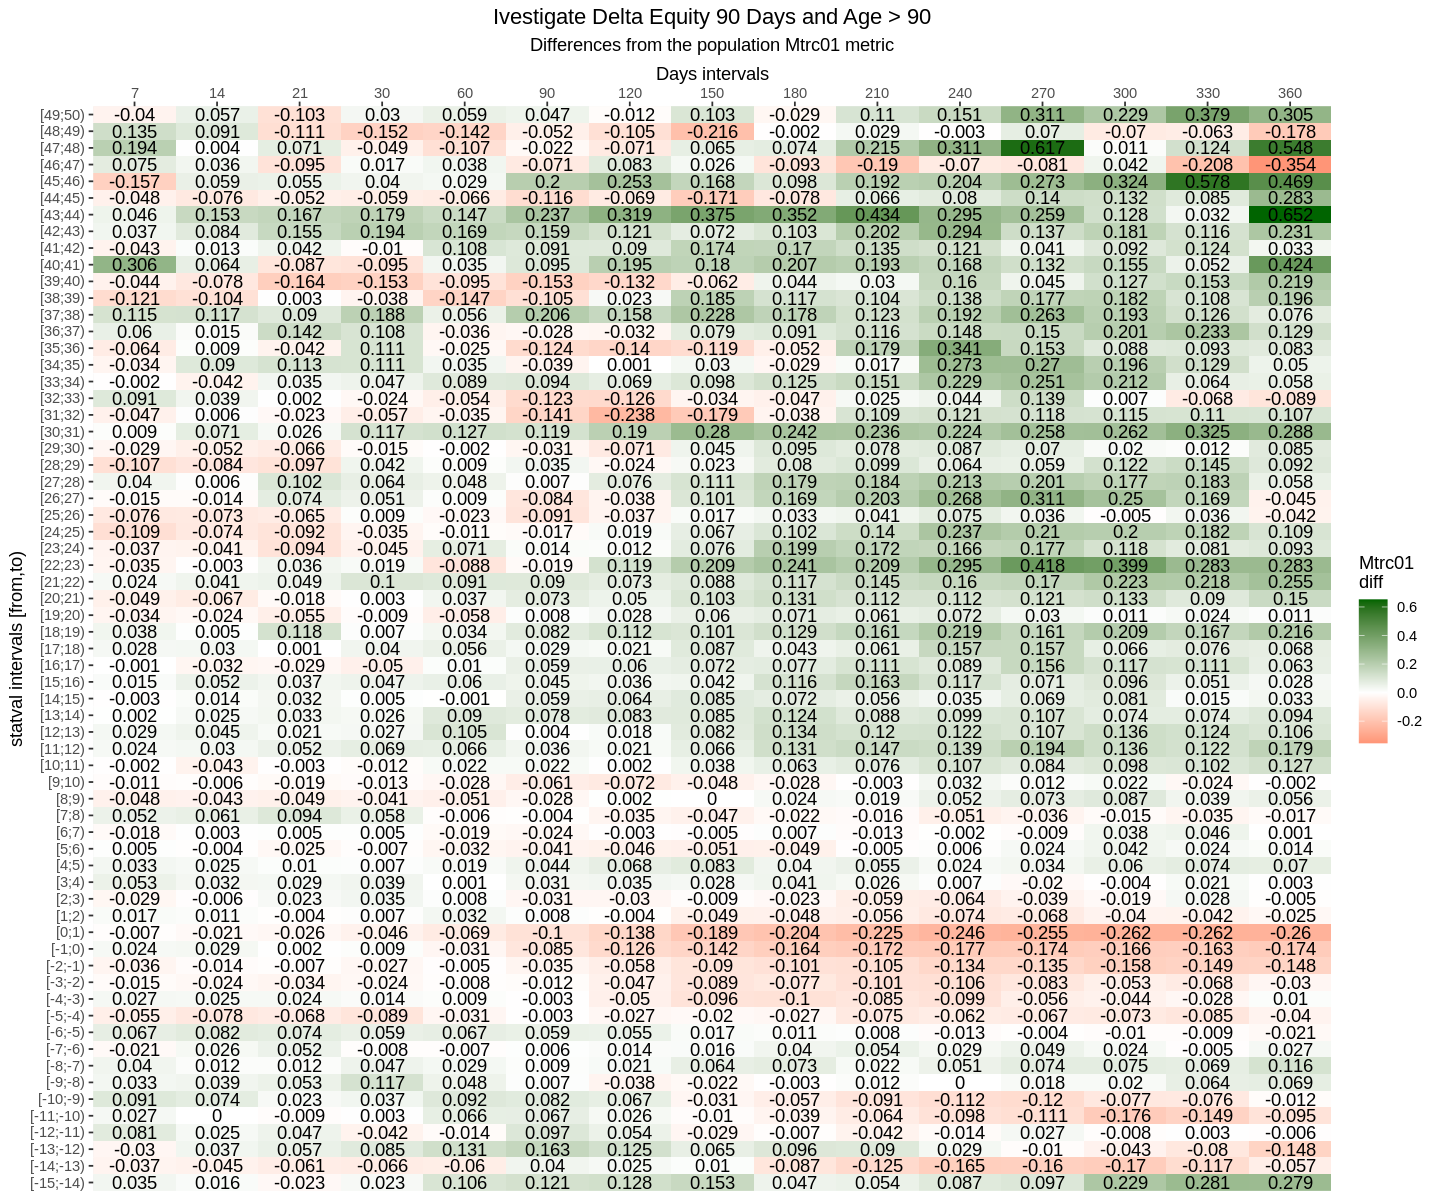

In [14]:
showMetricDifferences(experiment, result)

In [15]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection            Sys007 Sys014 Sys021 Sys030 Sys060 Sys090 Sys120 Sys150
1  49 <= statval < 50    47     45     43     43     36     33     31     25   
2  48 <= statval < 49    58     57     56     55     50     46     44     40   
3  47 <= statval < 48    66     63     61     59     54     47     40     35   
4  46 <= statval < 47    53     52     51     50     41     39     34     29   
5  45 <= statval < 46    63     61     60     59     54     49     42     39   
6  44 <= statval < 45    71     69     68     64     57     48     46     42   
7  43 <= statval < 44    65     65     64     62     54     48     42     38   
8  42 <= statval < 43    74     72     69     66     62     57     54     43   
9  41 <= statval < 42    72     71     67     63     58     56     51     43   
10 40 <= statval < 41    76     74     70     69     60     53     48     44   
11 39 <= statval < 40    94     90     86     82     77     68     61     50   
12 38 <= statval < 39    76     74     72     70     65     58     50     42   
13 37 <= statval < 38   100    100     99     95     86     77     73     64   
14 36 <= statval < 37    95     93     89     85     81     76     67     62   
15 35 <= statval < 36    92     89     86     85     78     71     65     58   
16 34 <= statval < 35   103    100     99     96     84     71     66     59   
17 33 <= statval < 34   128    126    125    124    111     99     89     83   
18 32 <= statval < 33   132    127    125    122    110    102     92     76   
19 31 <= statval < 32   148    146    142    139    118    108    102     85   
20 30 <= statval < 31   127    124    123    120    106    101     91     84   
21 29 <= statval < 30   145    143    143    137    122    109    103     91   
22 28 <= statval < 29   174    171    167    160    146    137    129    116   
23 27 <= statval < 28   183    182    177    174    149    134    120    106   
24 26 <= statval < 27   201    198    192    184    171    148    134    113   
25 25 <= statval < 26   211    207    202    195    175    162    145    130   
26 24 <= statval < 25   197    191    182    180    162    147    132    118   
27 23 <= statval < 24   221    216    212    203    181    156    139    119   
28 22 <= statval < 23   245    241    235    225    201    182    158    148   
29 21 <= statval < 22   248    243    234    227    209    186    172    156   
30 20 <= statval < 21   271    269    266    256    223    197    181    165   
⋮  ⋮                    ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
36 14 <= statval < 15   417    406    389    373    332    293    274    245   
37 13 <= statval < 14   442    436    432    421    371    340    308    279   
38 12 <= statval < 13   458    448    438    426    382    332    301    275   
39 11 <= statval < 12   512    503    489    466    410    357    325    292   
40 10 <= statval < 11   528    518    502    493    452    408    360    318   
41 9 <= statval < 10    547    532    525    504    444    397    358    314   
42 8 <= statval < 9     600    592    571    546    484    417    368    341   
43 7 <= statval < 8     624    605    587    568    502    434    389    347   
44 6 <= statval < 7     641    621    602    575    501    438    377    343   
45 5 <= statval < 6     674    654    634    610    535    475    419    374   
46 4 <= statval < 5     688    659    640    622    549    482    432    392   
47 3 <= statval < 4     706    689    673    653    568    505    437    398   
48 2 <= statval < 3     742    712    687    654    576    521    465    413   
49 1 <= statval < 2     741    718    694    673    583    495    439    397   
50 0 <= statval < 1     811    786    758    721    614    552    495    441   
51 -1 <= statval < 0    863    828    800    771    663    570    500    441   
52 -2 <= statval < -1   758    726    697    659    570    511    439    392   
53 -3 <= statval < -2   716    678    656    617    530    456    394    356   
54 

### Discussion

Daniil: Use the DeltaEquity90Days attribute with a negative value, this makes it possible to send good strategies in the top, despite a slight drawdown (7%). 
The idea is that everyone has loss periods, and this is not a reason to downgrade too much.